# MNIST Digit Classification 

In [47]:
# %tensorflow_version 2.x
import tensorflow as tf

# !pip install mitdeeplearning as mdl
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# assert len(tf.config.list_physical_devices('GPU')) > 0

## Load dataset 

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float64)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float64)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
train_images.shape

(60000, 28, 28, 1)

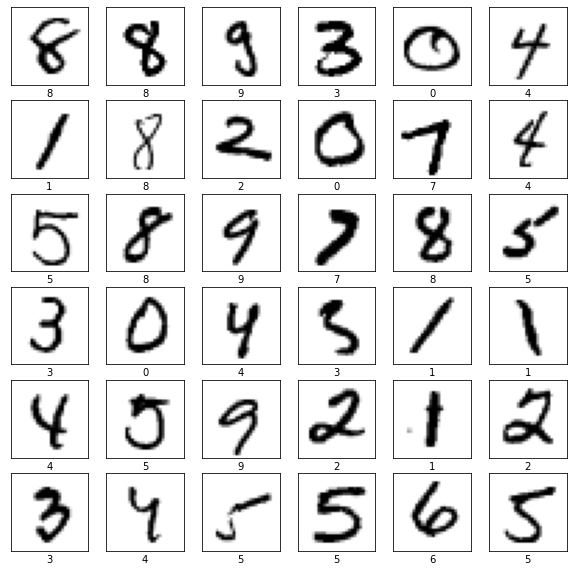

In [6]:
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## First trial, FCNNs 

In [29]:
def build_fc_model():
    fc_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return fc_model

model = build_fc_model()

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
BATCH_SIZE = 64
EPOCHS = 5
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 1s 687us/step - loss: 0.2184 - accuracy: 0.9347
Epoch 2/5
938/938 [==============================] - 1s 673us/step - loss: 0.1266 - accuracy: 0.9621
Epoch 3/5
938/938 [==============================] - 1s 663us/step - loss: 0.1118 - accuracy: 0.9676
Epoch 4/5
938/938 [==============================] - 1s 694us/step - loss: 0.1061 - accuracy: 0.9694
Epoch 5/5
938/938 [==============================] - 1s 661us/step - loss: 0.0915 - accuracy: 0.9747


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 483us/step - loss: 0.1490 - accuracy: 0.9685
Test accuracy: 0.968500018119812


## Second trial, CNNs 

In [36]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(24, 3, activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(36, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return cnn_model

cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]]) # initalize the model by passing some data through
print(cnn_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               115328    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [37]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [38]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1240 - accuracy: 0.9615
Epoch 2/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0617 - accuracy: 0.9811
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0519 - accuracy: 0.9840
Epoch 4/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0518 - accuracy: 0.9850
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0449 - accuracy: 0.9872


In [40]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9809
Test accuracy: 0.98089998960495


In [41]:
predictions = cnn_model.predict(test_images)

In [42]:
predictions[0]

array([4.3309933e-16, 7.7134499e-10, 1.4607204e-10, 2.1614953e-10,
       3.0274640e-11, 4.2088842e-17, 7.0834536e-19, 1.0000000e+00,
       1.4717838e-14, 2.9525435e-10], dtype=float32)

In [44]:
prediction = np.argmax(predictions[0])
print(prediction)

7


Label of this digit is: 7


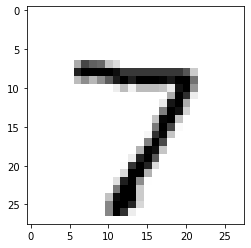

In [45]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0, :, :, 0], cmap=plt.cm.binary)

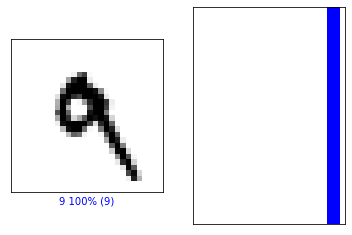

In [49]:
image_index = 7
plt.subplot(1, 2, 1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)

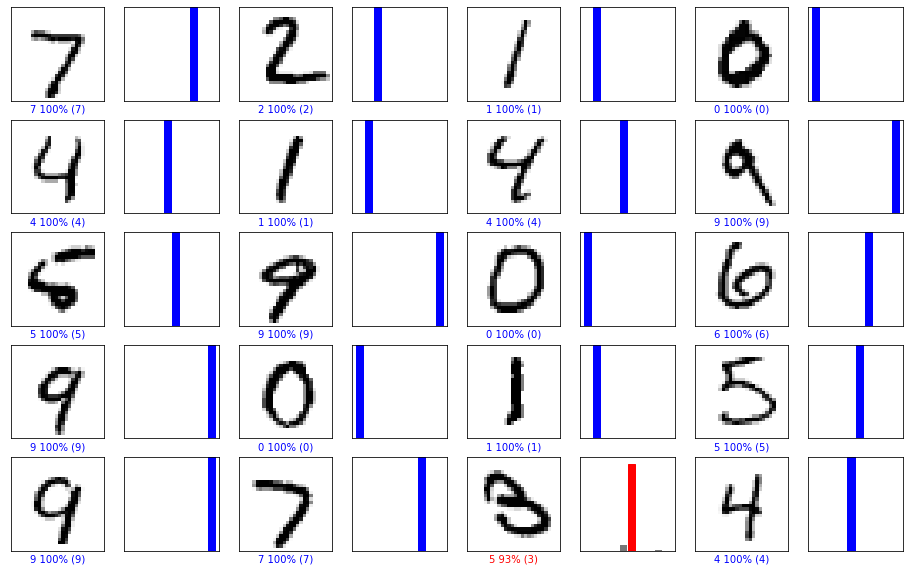

In [50]:
num_rows = 5
num_cols = 4
num_images = num_cols * num_rows
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    mdl.lab2.plot_value_prediction(i, predictions, test_labels)

## Train the CNN model more sophisticatedly

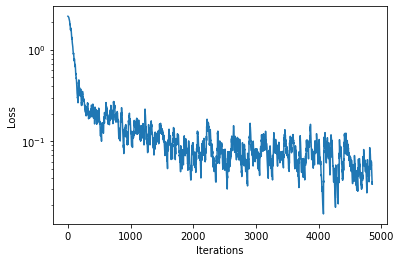

100%|██████████| 5000/5000 [00:48<00:00, 103.66it/s]


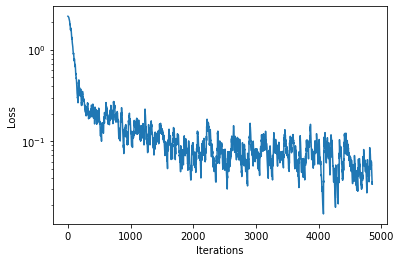

In [54]:
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, '_instances'): tqdm._instances.clear()
    
for idx in tqdm(range(0, train_images.shape[0], batch_size)):
    (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        logits = cnn_model(images)
        loss_values = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
        
    loss_history.append(loss_values.numpy().mean())
    plotter.plot(loss_history.get())
    
    # backwards
    grads = tape.gradient(loss_values, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))